## Importing Libraries

## Importing Libraries
**Pandas** :  Pandas Library is used for the *Data Manipulation and Analysis*.

**Numpy**  :  Numpy Library is use for Mathematical Computation and used as Arrays.

**Matplotlib** : Matplotlib Library is used to create Visualization from the Data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [3]:
df = pd.read_csv('Population.csv')

In [4]:
df.head()

,Unnamed: 0,Year,Male,Female,Male (%),Female ( %),Population
0,0,1960,232504741,218042938,51.604914,48.395086,450547679
1,1,1961,237313421,222328744,51.630037,48.369963,459642165
2,2,1962,242296454,226780736,51.653856,48.346144,469077190
3,3,1963,247438411,231387197,51.676102,48.323898,478825608
4,4,1964,252717316,236130819,51.696488,48.303512,488848135


In [5]:
df.drop(columns={'Unnamed: 0'},axis=1,inplace=True)

In [6]:
df.head()

,Year,Male,Female,Male (%),Female ( %),Population
0,1960,232504741,218042938,51.604914,48.395086,450547679
1,1961,237313421,222328744,51.630037,48.369963,459642165
2,1962,242296454,226780736,51.653856,48.346144,469077190
3,1963,247438411,231387197,51.676102,48.323898,478825608
4,1964,252717316,236130819,51.696488,48.303512,488848135


In [7]:
df.corr()

,Year,Male,Female,Male (%),Female ( %),Population
Year,1.000000,0.997777,0.997838,0.946535,-0.946535,0.997808
Male,0.997777,1.000000,0.999993,0.936990,-0.936990,0.999998
Female,0.997838,0.999993,1.000000,0.936131,-0.936131,0.999998
Male (%),0.946535,0.936990,0.936131,1.000000,-1.000000,0.936581
Female ( %),-0.946535,-0.936990,-0.936131,-1.000000,1.000000,-0.936581
Population,0.997808,0.999998,0.999998,0.936581,-0.936581,1.000000


<AxesSubplot:>

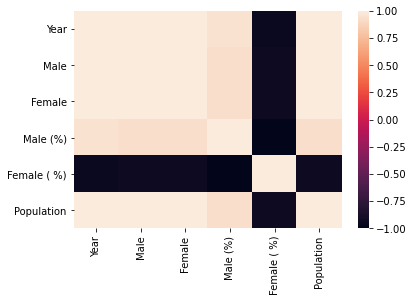

In [8]:
sns.heatmap(df.corr())

## Regplot

In Exploratory Analysis is known that Population and the Year are Highly Correlated.

<AxesSubplot:xlabel='Year', ylabel='Population'>

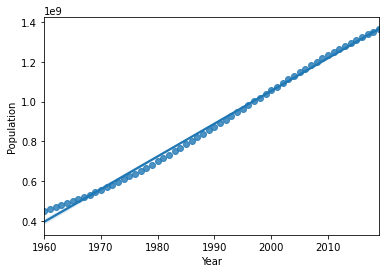

In [9]:
sns.regplot(data=df,x='Year',y='Population')

## Examination of Independent Variable ( X ) and Dependent Variable ( Y )

In [10]:
x = df[['Year']]

In [11]:
x.head()

,Year
0,1960
1,1961
2,1962
3,1963
4,1964


In [12]:
y = df['Population']

In [13]:
y.head()

0    450547679
1    459642165
2    469077190
3    478825608
4    488848135
Name: Population, dtype: int64

## Train and Test Split Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [16]:
len(x_train)

48

In [17]:
len(x_test)

12

In [18]:
x_train.head()

,Year
30,1990
41,2001
33,1993
43,2003
49,2009


## Model Training 

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm

LinearRegression()

In [22]:
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
predicted = lm.predict(x_train)

In [24]:
predicted

array([8.89183992e+08, 1.07144909e+09, 9.38892655e+08, 1.10458820e+09,
       1.20400552e+09, 5.08084243e+08, 6.24071123e+08, 9.22323101e+08,
       1.22057508e+09, 8.72614438e+08, 1.08801864e+09, 1.28685330e+09,
       6.90349341e+08, 1.31999240e+09, 8.39475329e+08, 6.40640678e+08,
       4.74945135e+08, 9.05753547e+08, 6.57210232e+08, 1.23714463e+09,
       7.23488449e+08, 1.25371419e+09, 5.24653798e+08, 6.07501569e+08,
       8.06336221e+08, 1.00517087e+09, 6.73779786e+08, 1.13772731e+09,
       1.18743597e+09, 1.33656196e+09, 1.02174043e+09, 4.08666918e+08,
       5.90932015e+08, 1.15429686e+09, 7.89766666e+08, 4.91514689e+08,
       7.73197112e+08, 9.88601318e+08, 7.40058004e+08, 7.06918895e+08,
       5.41223352e+08, 1.03830998e+09, 1.30342285e+09, 4.41806026e+08,
       3.92097363e+08, 1.27028374e+09, 1.17086642e+09, 1.12115775e+09])

<h4>What is the value of the y intercept?</h4>

In [25]:
y_intercept = lm.intercept_

In [26]:
y_intercept

-32084229062.361053

<h4>What is the value of the Slope?</h4>

In [27]:
slope_m = lm.coef_

In [28]:
slope_m

array([16569554.29878593])

<h4>Accuracy of the model?</h4>

In [29]:
lm.score(x_test,y_test)

0.9957258063143007

In [30]:
def Population_prediction(y_intercept,slope_m,x):
    y = slope_m*x+y_intercept
    return y

In [33]:
print(Population_prediction(y_intercept,slope_m,2021))

[1.40284018e+09]


In [32]:
lm.predict([[2021]])

array([1.40284018e+09])